전체 프로세스에 대한 오차
각 센서들로부터의 오차 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)  #42하면 다른 사람들이랑도 같은 숫자 나옴,
steps = 50
real_pos = np.zeros(steps)
sensor_pos = np.zeros(steps)
kalman_pos = np.zeros(steps)

In [5]:
print(real_pos)  #점진적으로 포지션을 옮겨가야함. 랜덤한 숫자를 50번 더해

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [13]:

# Kalman 필터 초기화
x = 0.0  # 초기 추정 위치
P = 1.0  # 초기 추정 공분산
Q = 0.1  # 프로세스 노이즈 공분산
#R = 1.0  # 관측 노이즈 공분산
R = 0.1

# Kalman 필터 함수
def kalman_filter(z, x, P, Q, R):
    # 예측 단계
    x_pred = x
    P_pred = P + Q

    # 갱신 단계
    K = P_pred / (P_pred + R)
    x = x_pred + K * (z - x_pred)
    P = (1 - K) * P_pred

    return x, P


In [14]:
for i in range(1, steps):  #[0]은 초기값이니까 고정. real_pos를 바꿔보겠담
  real_pos[i] = real_pos[i-1] + np.random.randn()   #0~1사이 랜덤 숫자 더해주기 -> real_pos옮기기?]
  #sensor_pos[i] = sensor_pos[i-1] + np.random.rand() + np.square(R)   # sensor_pos에 오차 추가. 이러면 오차가 계속 늘 수 밖에 없엄
  sensor_pos[i] = real_pos[i-1] + np.random.randn() + np.square(R) #square R이 센서의 오차. 그냥 R로 둬도 됨. 어떻게 R 적용할지는 알아서 찾기. 시스템마다 다름. 언제는 np.sqrt도 쓰고 함

print(real_pos)
print(sensor_pos)

#공식은 시스템마다 다르고 R도 다르니까 위 공식을 너무 의식하지말아라.
#갱신단계를 잡는 게 관건.
#Q포함. 조정을 하는 값이다.

[ 0.          1.76545424  0.50457029  2.62672648  1.10735652  2.37426767
  2.81808709  1.89115662 -1.35011072 -1.60267887  0.02973244 -0.41031205
  1.03096124  2.19412499  1.21261634  1.41167603  1.48147812  1.59499546
  3.18101228  5.31404566  5.16226056  5.44325243  5.23513018  4.64576542
  5.00278091  5.90238078  6.7152429   5.88624789  6.6335415   6.6126399
  7.8903048   8.43740218  8.21972097  9.04513732 10.35061613 11.0325691
 11.35673545 11.45373142 10.63551074  9.62949336 10.78760423 11.41172405
 11.39947727 11.47528183 12.45040156 11.62490437 12.03783582 11.21561543
 11.460582   10.98954369]
[ 0.          0.41498171  2.69331619  1.54703555  2.15249241  0.40968705
  3.15890172  2.76856174  0.87676898 -2.5878939  -3.02282025  0.17047301
 -1.8361742   1.0511943   2.66622846  0.62239946  1.03636244  2.15360879
  0.36717997  1.23892448  5.91236286  4.54956104  4.96025149  6.09473227
  3.96285583  5.32008043  6.54200962  6.16506186  6.50661816  6.76086888
  6.03106851  7.69811214  9

In [16]:
for i in range(1, steps):
  kalman_pos[i], P = kalman_filter(real_pos[i], sensor_pos[i], P, Q, R)

print(kalman_pos)

[ 0.          1.65291486  1.25499745  2.22039118  1.50570749  1.62409917
  2.94826076  2.22629333 -0.49951919 -1.97899747 -1.13623891 -0.1884719
 -0.06418705  1.75756431  1.76784676  1.11019921  1.31145906  1.80836677
  2.10622397  3.75748788  5.44877414  5.10189269  5.13013586  5.19922151
  4.60556487  5.67996184  6.64907368  5.99274535  6.58506109  6.66925833
  7.18013973  8.15501851  8.72638287  9.04440902  9.86381001 10.65739455
 11.18702436 11.64783167 11.75108371  9.55379868 10.65145314 11.41715778
 11.06525411 11.19149397 12.02558771 11.82127743 11.66860608 11.62657556
 11.17719769 11.26191916]


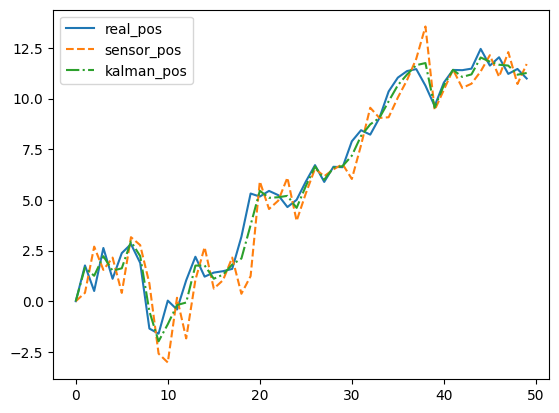

In [25]:
plt.plot(real_pos, label = "real_pos")
plt.plot(sensor_pos, label = "sensor_pos", linestyle = '--')
plt.plot(kalman_pos, label = "kalman_pos", linestyle = 'dashdot')
plt.legend()
plt.show()

이걸 이제 robot arm에 적용해보자.